In [1]:
#importing pandas

import numpy as np
import pandas as pd

In [2]:
#load the dataset
df = pd.read_csv('C:/Users/Hp/Desktop/dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
#PRE-PROCESSING
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.shape

(4981, 11)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
print(sorted(Counter(df['stroke']).items()))

[(0, 4733), (1, 248)]


In [7]:
loan_app=df[df['stroke']==1]
loan_ntapp=df[df['stroke']==0]

In [8]:
print(loan_app.shape,loan_ntapp.shape,df.shape)

(248, 11) (4733, 11) (4981, 11)


In [9]:
# x=df
# y=df['stroke']

In [10]:
# x.drop('stroke',axis=1,inplace=True)

In [11]:
from imblearn import under_sampling,over_sampling

In [12]:
#change categorical-data to numerical-data

from sklearn.preprocessing import LabelEncoder
category_data = ['gender', 'ever_married','work_type','Residence_type','smoking_status']

for data in category_data:
  df[data] = LabelEncoder().fit_transform(df[data])
  df

In [13]:
#Check For Null Values
df.isnull()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#bmi has null values
df['bmi'].isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
4976    False
4977    False
4978    False
4979    False
4980    False
Name: bmi, Length: 4981, dtype: bool

In [15]:
#replace null values with mean value ( avg )

#mean-value of bmi
mean = np.mean(df['bmi'])    
mean  

df['bmi'].fillna(mean,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [16]:
#Normalization = 0-1 Range

from sklearn.preprocessing import MinMaxScaler

#make age,bmi,glucose-levels in 0-1 range

df[['gender','age','work_type','avg_glucose_level','bmi','smoking_status']] = MinMaxScaler().fit_transform(df[['gender','age','work_type','avg_glucose_level','bmi','smoking_status']])


In [17]:
x = df.drop(columns='stroke')
y = df['stroke']

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resam,y_resam=ros.fit_resample(x,y)
print(sorted(Counter(y_resam).items()),y_resam.shape)

[(0, 4733), (1, 4733)] (9466,)


In [19]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
#split train-dataset - 80% and test-data - 30%
x_train, x_test, y_train, y_test = train_test_split(x_resam,y_resam,test_size = 0.2,random_state=1)

In [21]:
#Random Forest
modelRF = RandomForestClassifier()
modelRF.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
#Predict-test-data set
y_predict = modelRF.predict(x_test)
y_predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
#to check accuracy - compare test value and predicted value
accuracy = accuracy_score(y_test,y_predict)
accuracy


0.989440337909187

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
array = confusion_matrix(y_test,y_predict)
array

array([[938,  20],
       [  0, 936]], dtype=int64)

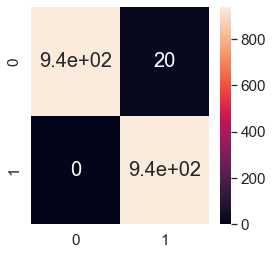

In [26]:
array = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(4,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(array, annot=True, annot_kws={"size": 20}) # font size
plt.show()

In [27]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       958
           1       0.98      1.00      0.99       936

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



In [28]:
print(x_test)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
4437     0.0  0.340820             0              0             1   0.000000   
2711     1.0  0.304199             0              0             1   0.666667   
8535     0.0  0.987793             0              0             1   0.333333   
4317     0.0  0.548340             0              0             1   0.333333   
4180     0.0  0.951172             1              0             1   0.333333   
...      ...       ...           ...            ...           ...        ...   
8817     1.0  0.987793             0              0             1   0.333333   
5491     1.0  0.926758             1              0             1   0.333333   
4747     0.0  0.633789             0              0             1   0.000000   
6504     1.0  0.853516             1              0             1   0.333333   
8547     0.0  0.963379             1              0             1   0.666667   

      Residence_type  avg_glucose_level

In [29]:
test = modelRF.predict_proba(x_test)
test[250][0]*100

0.0

In [30]:
# pred = model.predict([[0.0, 0.975586,1,0,1,0.50,1,0.132167,0.212981,0.666667]])

# print(pred)

In [31]:
# print((67-0.08)/(82-0.08))

In [32]:


datas = pd.read_csv('C:/Users/Hp/Desktop/dataset.csv')
datas

#change categorical-data to numerical-data

from sklearn.preprocessing import LabelEncoder
category_data = ['gender', 'ever_married','work_type','Residence_type','smoking_status']

for data in category_data:
  datas[data] = LabelEncoder().fit_transform(df[data])


#use fillna to replace null-values
mean = np.mean(datas['bmi'])    
mean  

datas['bmi'].fillna(mean,inplace=True)

# datas = datas.drop(columns='id')
datas

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [33]:
datas.shape

(4981, 11)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
print(sorted(Counter(datas['stroke']).items()))

[(0, 4733), (1, 248)]


In [35]:
loan_app=datas[datas['stroke']==1]
loan_ntapp=datas[datas['stroke']==0]

In [36]:
print(loan_app.shape,loan_ntapp.shape,datas.shape)

(248, 11) (4733, 11) (4981, 11)


In [37]:
x=datas
y=datas['stroke']

In [38]:
x.drop('stroke',axis=1,inplace=True)

In [39]:
from imblearn import under_sampling,over_sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resam,y_resam=ros.fit_resample(x,y)
print(sorted(Counter(y_resam).items()),y_resam.shape)

[(0, 4733), (1, 4733)] (9466,)


In [41]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.989440337909187

In [42]:
max(datas['bmi'])

48.9

In [43]:
max(datas['avg_glucose_level'])

271.74

In [44]:
max(datas['age'])

82.0

In [45]:
#create a pkl model file
import pickle
pickle.dump(modelRF,open('model1.pkl','wb'))


In [ ]:
def prediction(g,a,hyt,ht,m,w,r,gl,b,s):

  #gender
  if g == "male":
    g = 1
  elif g == "female":
    g = 0
  else:
    g = 2

  #age
  a = ((a - min(datas['age']))/(max(datas['age']) - min(datas['age'])))

  #tension
  if hyt == "yes":
    hyt = 1
  elif hyt == "no":
    hyt = 0


  #heart-issues
  if ht == "yes":
    ht = 1
  elif ht == "no":
    ht = 0

  
  #married
  if m == "yes":
    m = 1
  elif m == "no":
    m = 0


  #work-type
  if w == "government":
    w = 0
  elif w == "student":
    w = 1
  elif w == "private":
    w = 2
  elif w == "self-employed":
    w = 3
  else:
    w = 4


  #residence-type
  if r == "urban":
    r = 1
  else:
    r = 0


  #glucose-levels
  if gl == "i do not know":
    gl = np.mean(datas['avg_glucose_level'])
  else:
    gl = ((int(gl) - min(datas['avg_glucose_level']))/(max(datas['avg_glucose_level']) - min(datas['avg_glucose_level'])))

  
  #bmi
  b = ((b - min(datas['bmi']))/(max(datas['bmi']) - min(datas['bmi'])))


  #smoking
  if s == "unknown":
    s = 0
  elif s == "never smoked":
    s = 1
  elif s == "formerly smoked":
    s = 2
  elif s == "smokes":
    s = 3

  pred = modelRF.predict([[g,a,hyt,ht,m,w,r,gl,b,s]])
  print(pred)
  return pred[0][0]


#INPUT - FROM - USER
g = input("Enter your gender : ")
g = g.lower()

a = int(input("Enter your age : "))

hyt = input("Do you have hypertension ? yes or no : ")
hyt = hyt.lower()

ht = input("Do you have any heart Disease ? yes or no : ")
ht = ht.lower()

m = input("Have you been Married ? yes or no : ")
m = m.lower()

w = input("Worktype ? private/self-employed/student/government/others : ")
w = w.lower()

r = input("residency type ? rural or urban ? : ")
r = r.lower()

gl = input('enter glucose levels. ? Enter value or type "i do not know" : ' )
gl = gl.lower()

b = int(input("Enter BMI"))

s = input("Smoking Status => unknown/never smoked/formerly smoked/smokes : ")
s = s.lower()


#call prediction function
# op = prediction(g,a,hyt,ht,m,w,r,gl,b,s)
# # test = model.predict_proba([g,a,hyt,ht,m,w,r,gl,b,s])
# # test


#call prediction function
op = prediction(g,a,hyt,ht,m,w,r,gl,b,s)
if op == 1:
  print("Person has chances of having Stroke")
else:
  print("Patient has no risk of Stroke")



In [ ]:
# import pickle
# filename='model.pkl'
# pickle.dump(knn, open(filename, 'wb')

In [ ]:
# def stroke_pred(g, a, hyt, ht, m, w, r, gl, b, s):
#     # load model
#     model = pickle.load(open('model.pkl', 'rb'))
#     # predictions
#     result = model.predict([[g, a, hyt, ht, m, w, r, gl, b, s]])
#     proba = model.predict_proba([[g, a, hyt, ht, m, w, r, gl, b, s]])
#     # output
#     if result[0] == 1:
#         pred = 'Person Has chances of stroke:', proba[0][0]*100
     
#     else:
#         pred = 'Person Has No Risk of Stroke:', proba[0][0]*100
#     return pred

In [ ]:
python -m venv venv

In [ ]:
venv\Scripts\activate

In [ ]:
ipython kernel install --user --name=venv

In [ ]:
conda create -n envname python=x.x anaconda

In [ ]:
conda install -c conda-forge notebook

In [ ]:
conda create -n envname python=x.x anaconda

In [ ]:
pip install widgetsnbextension

In [ ]:
pip install ipywidgets

In [ ]:
pip install voila

In [ ]:
app.run()